<div align="center">
    <figure>


<p>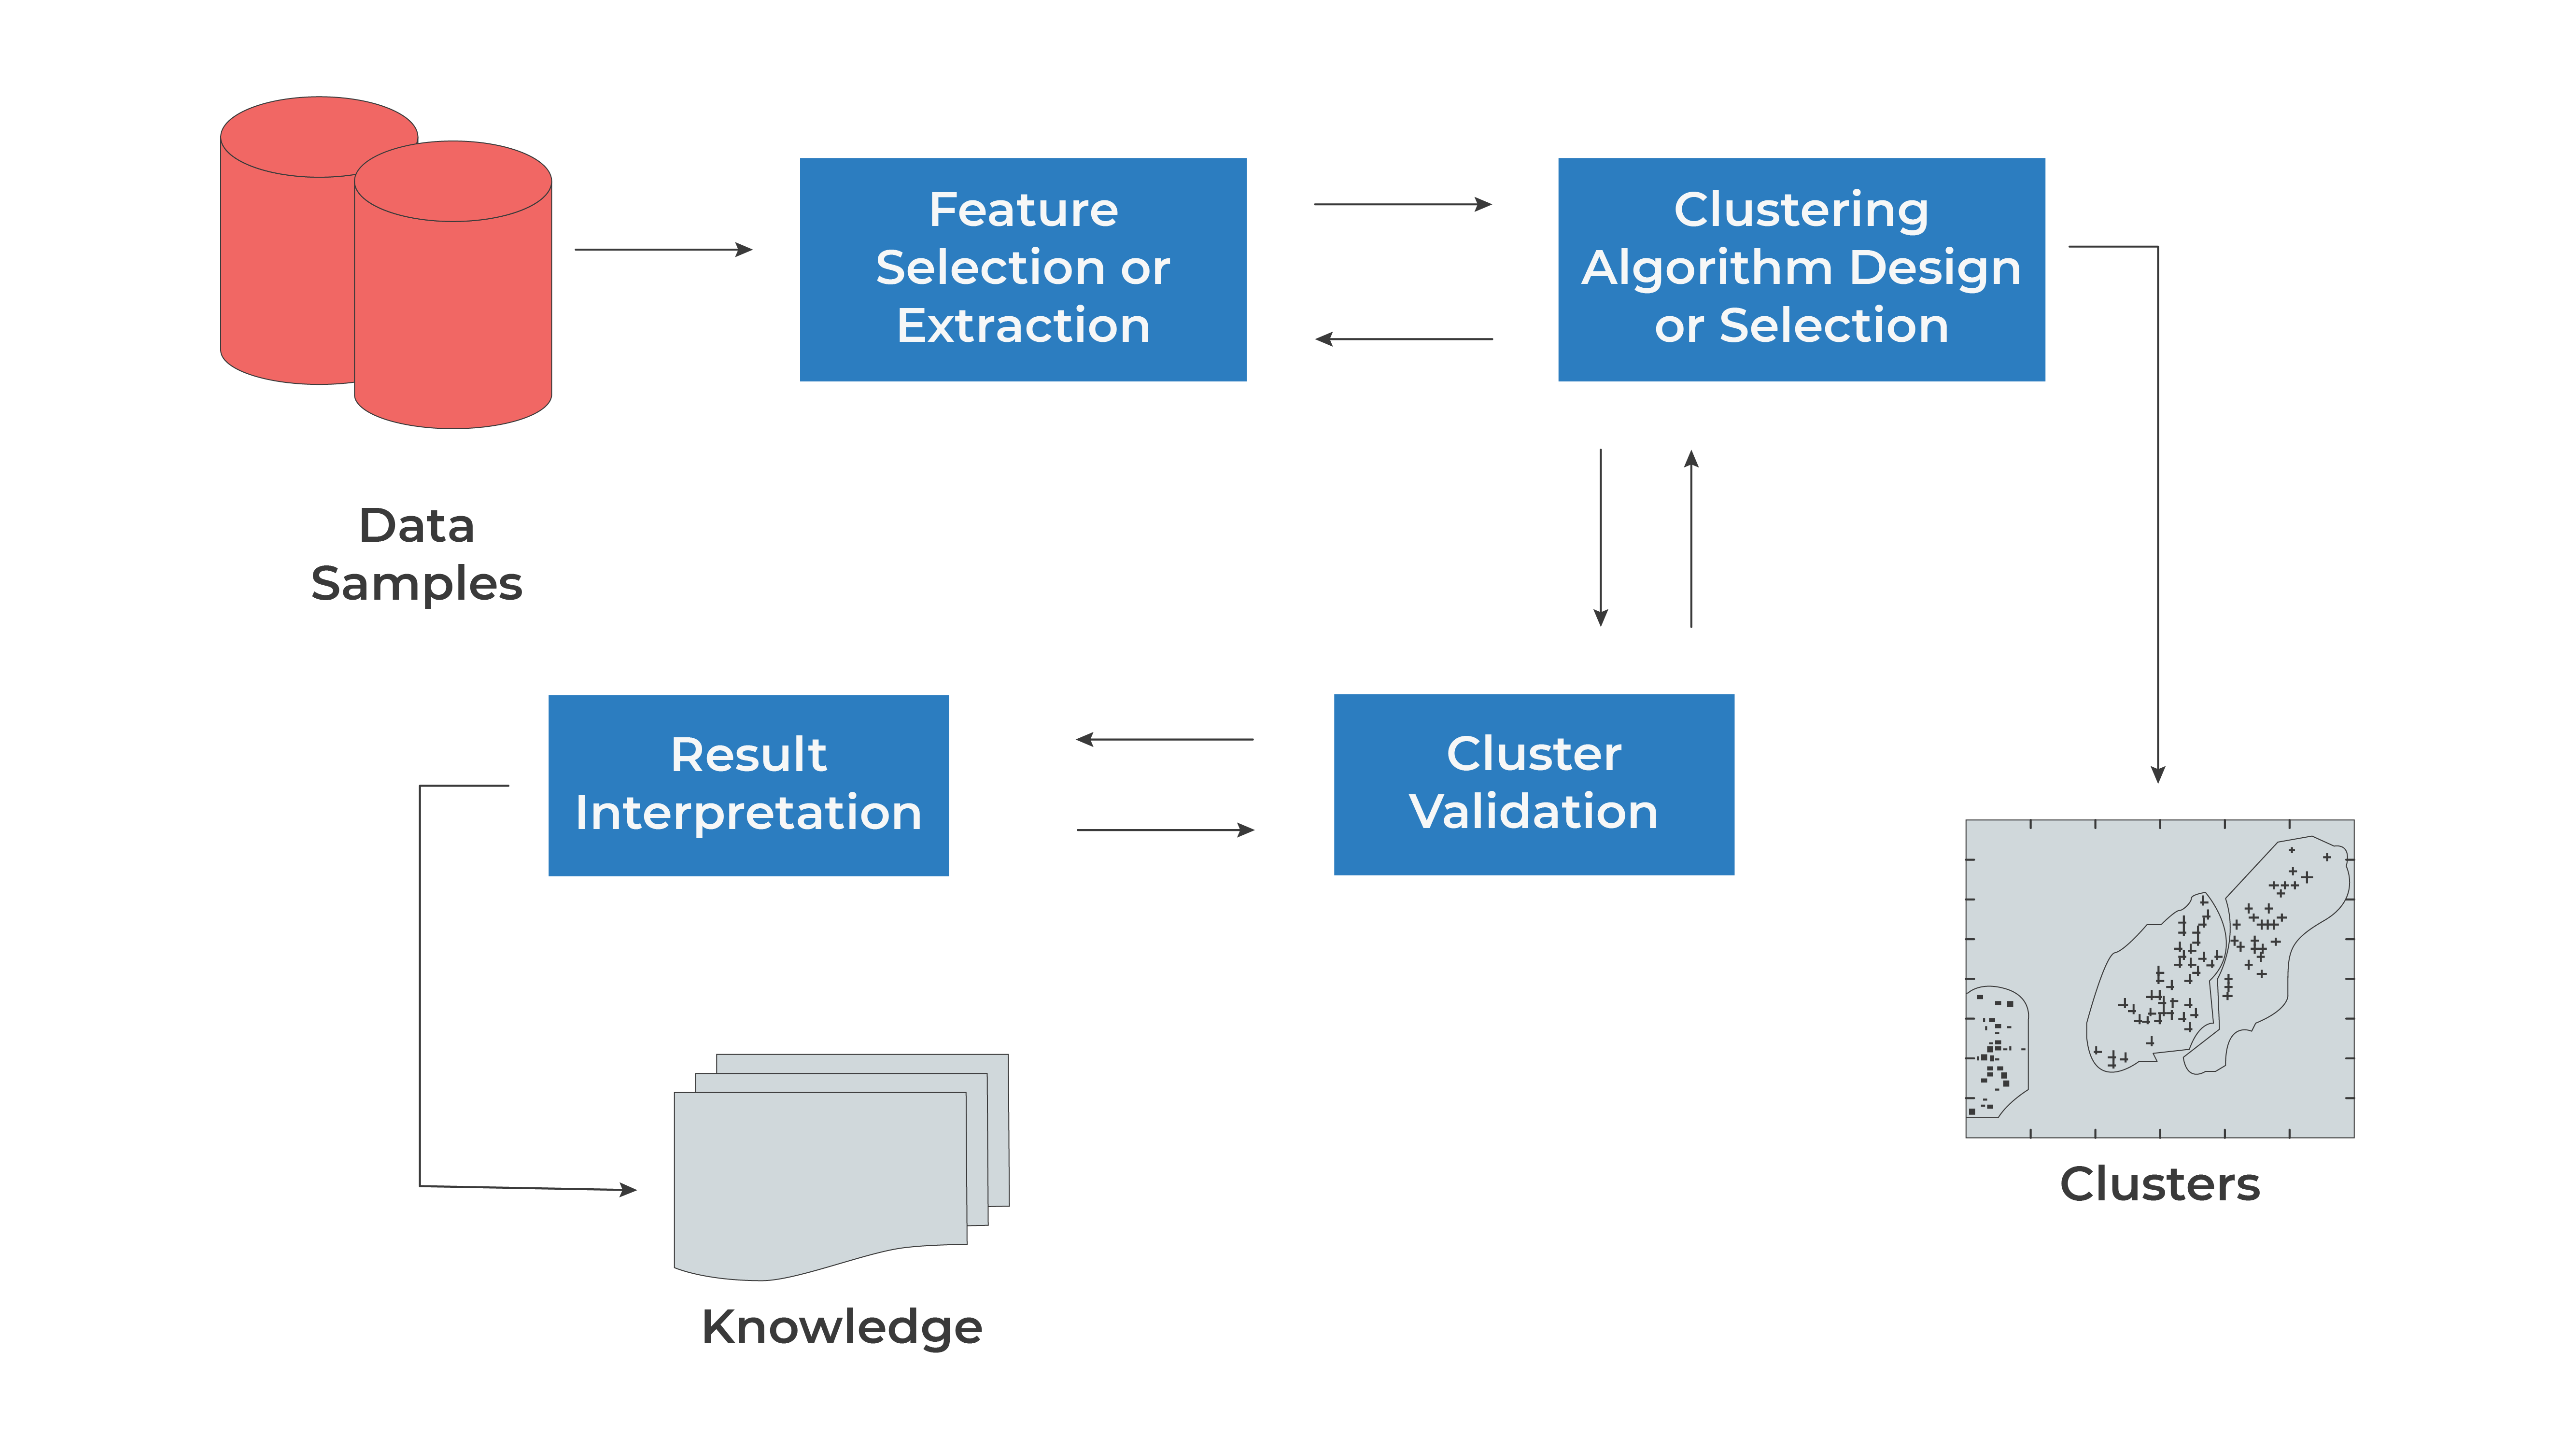</p>
        <figcaption>Figure 1: Clustering pipelines (src: Clustering procedure from <i>Xu, R., & Wunsch, D. (2008). Clustering (Vol. 10). John Wiley & Sons.</i>)</figcaption>
    </figure>
</div>


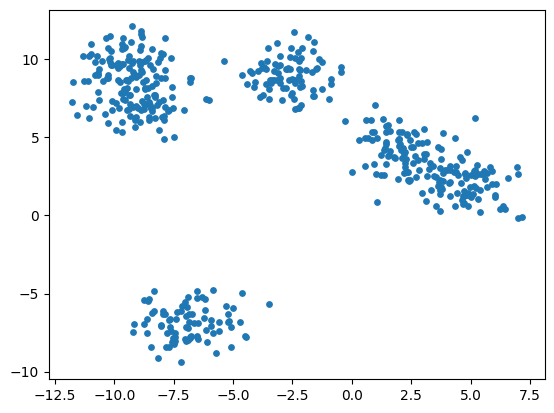

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


data,y = make_blobs(
    500, n_features=2, centers=6, cluster_std=1.1, random_state=42
)
plt.scatter(data[:,0],data[:,1], s=15)
plt.show()

## Types of Cluster Validation Criteria


According to the information being used in the validation process, a cluster validation can be categorized into three categories. We will study about these types throughout this chapter. For now, let's understand the basics of those algorithm.

If we have a dataset $X$ and the resulting set of clusters $C$.

1. Internal Criteria

> Internal criteria evaluates the clustering structure from the dataset $X$ without any external information. So, we only utilize the information present in $X$ and $C$. For example, one of the criteria can be to find out how well seperated the clusters are from each other. For this purpose, we only need the information about final cluster.

2. External Criteria

> In external criteria, the result of clustering $C$ is compared with some prior information like the predefined category labels $P$. Even if we have the labels for the dataset, it may not represent the spacial grouping of data, so it might not be a good estimate of clustering. 


3. Relative Criteria

> In relative criteria, we compare the clustering $C$ with clustering that comes from different clustering algorithm or from same algorithm with different hyper-parameters. For example, we can try out *K*-Means with different centroid initialization and compare their result to select the best one.


### Internal Criteria

The internal criteria uses the clustering result and the dataset to evaluate the quality of the clusters. The objective function of internal criteria can be thought of as placing similar objects in same cluster and dissimilar object in different which is similar to the objective of clustering algorithm. In internal criteria, we have two concepts that can be listed as,

1. Intra-cluster similarity

    It signifies the similarity between data points inside a cluster. Having higher intra-cluster similarity insinuates the compactness, connectedness and the homogeneity of the cluster.

2. Inter-cluster similarity

    It implies the similarity between two clusters. If two clusters are similar, then they are close to each other and vice-versa.

In this section, we are going to see some of the indices in internal criteria of cluster validation.


**Sum of Square Within Clusters (SSW)**

If $\mathcal C = \{\mathbf x_1, \mathbf x_2,\dots, \mathbf x_n\}$ is a cluster, then the sum of square within cluster can be calculated as,
$$
SSW = \sum_{i=1}^n (\mathbf x_i - c)^2
$$

Where $c$ is the centroid of the cluster calculated as,
$$
c = \frac{1}{n} \sum_{i=1}^n \mathbf x_i
$$

The SSW can be applied for only the numerical data types because we had to calculate the centroid. It asseses the **compactness** of a given cluster and is suitable if our goal is to obtain spherical clusters.

**Sum of Square Between Clusters (SSB)**

It measures how well the two given clusters are separated from each other. The separation is measured by calculating the distance of centroid of each clusters to the mean vector of all the data points.

<div align="center">
    <figure>


<p>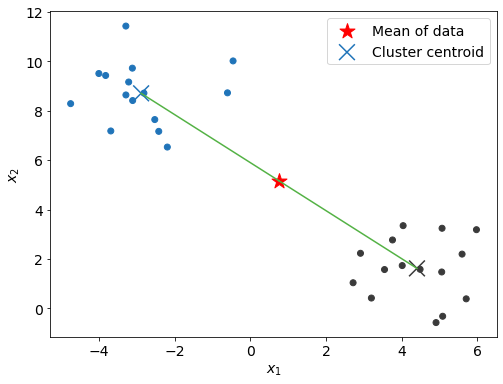</p>
        <figcaption>Figure 2: Sum of Square between Clusters</figcaption>
    </figure>
</div>

Figure above shows the mean of all the data points, centroid of each clusters, the distance between them. SSB is the sum of distance of centroid to the mean or centroid of all the data points. Higher value of SSB indicates the cluster are well separated.


**Silhouette Coefficient (SC)**

Silhoutte coefficient measures how well the objects of a clusters are placed in it as well as how well they are separated from the objects of different clusters. As you can see, it incorporates both the compactness and separability property we discuessed in SSW and SSB.

Let's say $a(x_i)$ calculates the average distance of $x_i$ to other points in same cluster $C_k$. This value indicates the goodness of assignment for $x_i$ in $C_k$ and also the compactness of that cluster. It can be written as,
$$
a(\mathbf x_i) = \frac{1}{N_k - 1} \sum_{j=1, j\neq i}^{N_k} d(\mathbf x_i, \mathbf x_j)
$$

Where, $N_k$ is the number of objects in cluster $C_k$.

Similarly, let's say a function $b(x_i)$ gives us the lowest average dissimilarity of the data point $x_i$ to other clusters. It is given as,
$$
b(\mathbf x_i) = \min_{k \neq l} \frac{1}{N_l} \sum_{j \in C_l} d(\mathbf x_i, \mathbf x_l)
$$

Now, the silhouette coefficient (SC) is given as,
$$
SC(\mathbf x_i) = \frac{b(\mathbf x_i) - a(\mathbf x_i)}{\max\{a(\mathbf x_i), b(\mathbf x_i)\}}
$$

Because we only need the dissimilarity measure $d(\cdot)$ to calculate the SC, it can be applied to any types or data or clustering.

The SC lies between $-1$ and $1$ and more it is closer to $1$ the better is the clustering. Below, we compare the SC for two results obtained from *K*-Means algorithm with different $K$ parameter.


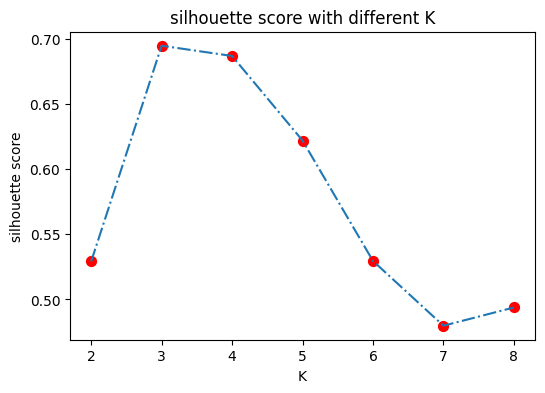

In [14]:
from sklearn.metrics import silhouette_score

scores = []
for K in range(2,9):
    model = KMeans(n_clusters=K, init="k-means++", random_state=99)
    model.fit(data)

    scores.append(silhouette_score(data, model.labels_))
    del model

plt.figure(figsize=(6,4))
plt.plot(range(2,9), scores, '-.')
plt.scatter(range(2,9), scores, s=50, marker='o', c='red')

plt.title("silhouette score with different K")
plt.xlabel("K")
plt.ylabel("silhouette score")

plt.show()

In [23]:
model = KMeans(n_clusters=6, init="k-means++", random_state=42)
model.fit(data)


KMeans(n_clusters=6, random_state=42)

### External Criteria


With external criteria, we measure the goodness of clustering result by comparing the clustering to some ground truth (if available) or other clusters independent of the algorithm.

Let's assume we have a predefined category in data $X$ given by $P$. Then in this criteria, we compare the resulting clustering $C$ with $P$. We are going to talk about some of the clustering criteria given below:


**Rand Index and Jaccard Coefficient**

Rand indices and Jaccard coefficient comes under the _pair-counting measures_ because we are using the aggrement of counted values for pair of data points in the two clusters. So, let's first define how we count the pairs in the dataset.

If we have two data points $x_i$ and $x_j$ from $X$, then we can have four different combination about the assignment of those pair of data.
- They both lies in the same cluster in both $P$ and $C$. Let's denote the number of those aggrements as $a$.

- They both lies in different cluster in both $P$ and $C$. This is also the aggrement between the clusters and let's denote this with $b$.

- The pair of data points lies in same cluster in $P$ but in different cluster in $C$. Let's denote this disaggrement in the cluster assignment with $c$.

- Also, the pair can be in different clusters in $P$ but in same cluster in $C$. This is also the disaggrement between the cluster assignement and let's denote it using $d$.

Now, the Rand index can be given as,
$$
R = \frac{a + b}{a + b + c + d} = \frac{a + b}{{n \choose 2}}
$$

The rand index gives the normalized value of aggrement between the two data clusters. The numerator indicates the aggrement of the two clusters, whereas the denomenator is the total number of pairs of data available.

Similarly, the **Jaccard coefficient** can be calculated as,
$$
J = \frac{a}{a + b + c}
$$


In [24]:
from sklearn.metrics import jaccard_score

jaccard_score(y, model.labels_, average = 'weighted')

0.36364285714285716

**Mutual Information (MI)**

Mutual Information (MI) falls into the **information theoretic category**. Most of the information theoretic measures uses the concept of entropy when comparing the clusters. MI gives us the information about the reduction of entropy of class labels that we get if we know the cluster labels. Mathematically, it can be written as,
$$
\begin{align}
MI &= H(P) - H(C\vert P)\\
\end{align}
$$

Here, $H(P)$ denotes the entropy of class labels. Because we have the class label information even before we apply clustering, this can be calculated even before the clustering. On the other hand, $H(C)$ is the entropy of cluster labels. It is calculated for each of the clustering results. The term $H(C\vert P)$ is the conditional entropy of class labels $P$ for clustering $C$.

The MI can be written in terms of probability as,
$$
MI(P, C) = \sum_{i=1}^k\sum_{j=1}^l p(P_i, C_j) \log\frac{p(P_i, C_j)}{p(P_i)p(C_j)}
$$

Range: 0 to infinity

In [26]:
from sklearn.metrics import mutual_info_score

mutual_info_score(y, model.labels_)

1.474168555312259

## Relative Criteria


As you have studied above the internal and external criteria employ the statistical hypothesis testing methodology. The indices were used to either accept or reject the null hypothesis. Relative criteria is a little bit different because it is more of a methodology than statistical approach. The external and internal criteria were also computationally expensive which may not be always the case for relative criteria. The relative criteria compares the result of clustering from different algorithms or from the same algorithm but with different parameters.

One of the issue in clustering is to know the number of clusters in the data which is generally denoted by $K$. We will use this parameter as an example because it is common in both partition based clustering where we have to prespecity $K$ and in hierarchical clustering where we should know the level where to cut the dendogram. Underestimating and overestimating the value of $K$ can have undesirable effects. For example, if we underestimate the number of clusters, then the resultant clusters will contain more than one real clusters of data and the interpretation of result would be faulty. Similarly, overestimating the number of clusters will sometimes break a single cluster and the interpretation of result would not be effective. Remember that the algorithm will always produce the specified number of cluster even though there might be lesser or more clusters.

We will discuss two relative criteria below.

1. Data visualization

    Data visualization can give us the information about the number of clusters or other parameters if the visualization of data is effective in 2D or 3D space. In general, the data are more complex and contains attribute in dimension greater than three. If the visualization is possible using various technique, we can get some intuition of data and parameters to experiment with.

2. Validation indices

    Another method to find the best parameter for example the number of clusters $K$ is to run the algorithm multiple times from say $K_{min}$ to $K_{max}$, then evaluate some indices to compare their results. Internal indices you studied above can be used to evaluate the result or some objective function. Generally, computing the compactness and separability of clusters is a good way to evaluate the individual results.

    The Elbow Method you studied in the *K*-Means algorithm falls into this type of validation where we performed the operation described above with increasing value of $K$.
